# Experiments with Python, Cython, Pandas and more!
I'm writing this notebook to take notes on my Python adventures

In [41]:
import numpy as np
import pandas as pd

# Open a binary file for reading
filename = "C:\\Users\\jflam\\OneDrive\\Garmin\\2010-03-21-20-31-06.fit"
import io
stream = io.open(filename, "rb")

In [38]:
# Note that this is a BufferedReader object
print(stream)

<_io.BufferedReader name='C:\\Users\\jflam\\OneDrive\\Garmin\\2010-03-21-20-31-06.fit'>


In [43]:
# Compute length of a file
import os
print(os.path.getsize(filename))

1004


In [30]:
# Work with the data
import struct

buffer = stream.read(8)
value = struct.unpack('Q', buffer) # this is little-endian for big endian use >Q
print(value)
print(value[0])
print(format(value[0],'08x'))

(15940693183265609850,)
15940693183265609850
dd38b7fe2609987a


In [35]:
# This is a more convenient way of unpacking data, thanks to SO 17537071

def unpack(stream, fmt):
    size = struct.calcsize(fmt)
    buf = stream.read(size)
    return struct.unpack(fmt, buf)

# The above now reduces to:

print(format(unpack(stream, 'Q')[0], "08x"))

3de0039000c


In [62]:
%matplotlib inline

# Using fit parser
import sys
sys.path.append("c:/users/jflam/src/FitPanda/")

from fit_parser import RecordDecl
from fit_parser_dataframe import parse_fit_as_dataframe

df = parse_fit_as_dataframe('c:/users/jflam/src/FitPanda/large_file.fit', [RecordDecl.power, RecordDecl.heart_rate])


In [63]:
df.head()

,heart_rate,power
0,107,0
1,109,0
2,110,0
3,110,0
4,111,0


In [64]:
# Average heart rate
df["heart_rate"].mean() 

147.03137191157347

In [65]:
# Average power
df["power"].mean()

148.70228676709655

In [66]:
# Peak power
df["power"].max()

529.0

In [67]:
# Peak heart rate
df["heart_rate"].max()

173

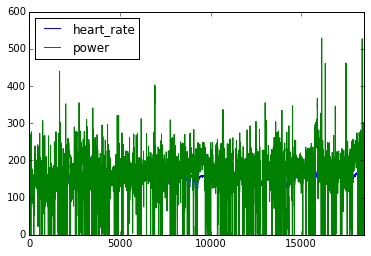

In [68]:
df.plot() # plots both heart rate and power

In [69]:
df2 = df["heart_rate"]
df2.head()

0    107
1    109
2    110
3    110
4    111
Name: heart_rate, dtype: int64

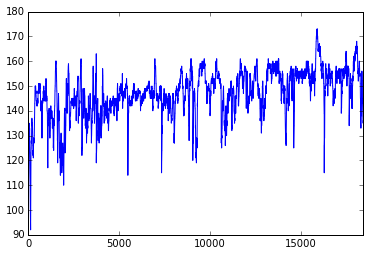

In [70]:
df2.plot()